<a href="https://colab.research.google.com/github/almachn/05.-C/blob/main/Tugas_Chapter_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NO.2-Operator Sobel yang digunakan untuk pendeteksian tepi**

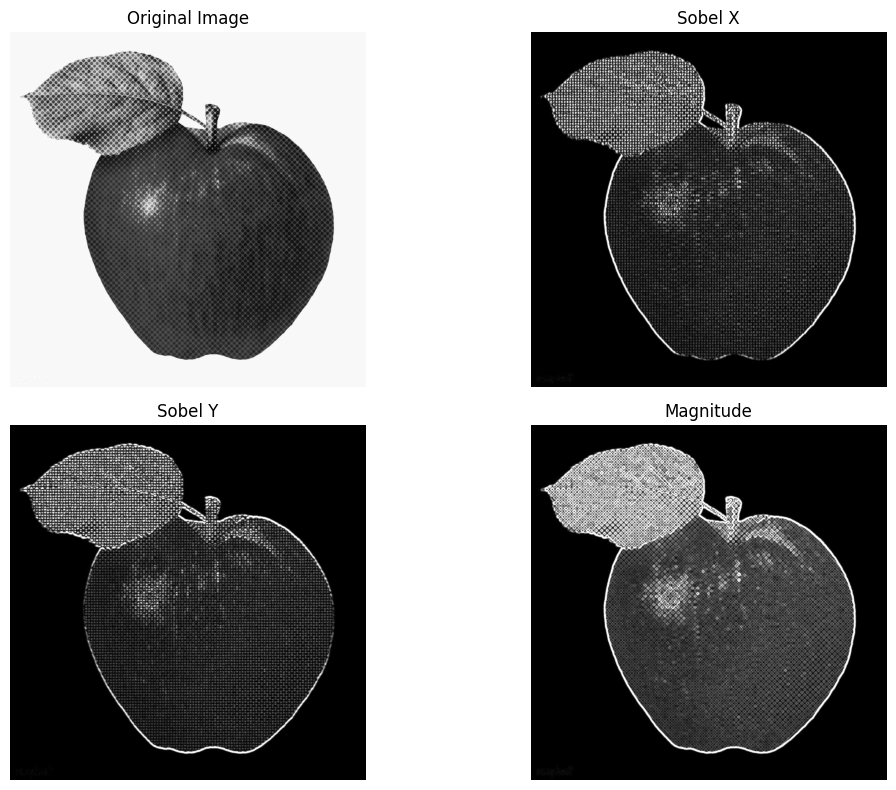

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca Gambar dan Konversi ke Grayscale
image = cv2.imread('apple.jpg', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Gambar tidak ditemukan! Pastikan path benar.")

# 2. Praproses Gambar dengan Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# 3. Terapkan Sobel Operator
# Sobel X - Gradien horizontal
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)

# Sobel Y - Gradien vertikal
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# 4. Kombinasikan Sobel X dan Sobel Y
magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalisasi agar mudah divisualisasikan
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
magnitude = cv2.convertScaleAbs(magnitude)

# 5. Tampilkan Hasil
titles = ['Original Image', 'Sobel X', 'Sobel Y', 'Magnitude']
images = [image, sobel_x, sobel_y, magnitude]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


**NO. 4- Mendeteksi tepi pada citra dengan derau "salt-and-pepper" menggunakan metode Canny dan Sobel setelah melakukan image smoothing menggunakan Gaussian filter**

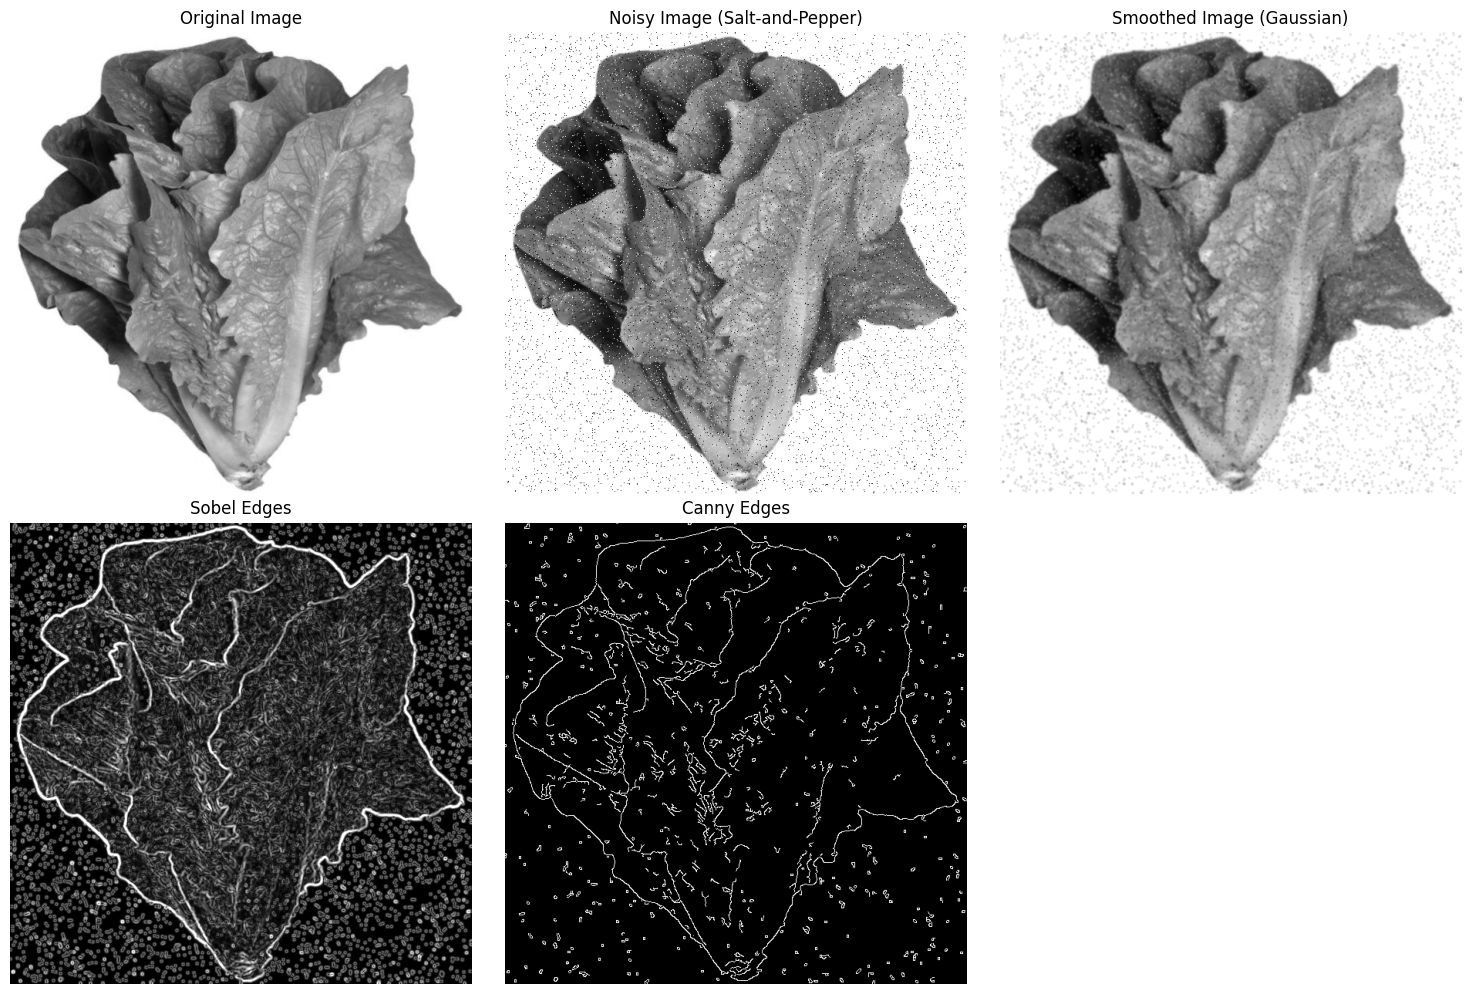

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menambahkan derau salt-and-pepper
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Tambahkan salt (nilai maksimum)
    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Tambahkan pepper (nilai minimum)
    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

# 1. Baca Gambar dan Konversi ke Grayscale
original_image = cv2.imread('sayur.jpg', cv2.IMREAD_GRAYSCALE)
if original_image is None:
    raise FileNotFoundError("Gambar tidak ditemukan! Pastikan path benar.")

# Tambahkan derau salt-and-pepper
noisy_image = add_salt_and_pepper_noise(original_image, salt_prob=0.02, pepper_prob=0.02)

# 2. Terapkan Gaussian Filter untuk Image Smoothing
smoothed_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# 3. Deteksi Tepi dengan Sobel
# Sobel X dan Y
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalisasi untuk visualisasi
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

# 4. Deteksi Tepi dengan Canny
canny_edges = cv2.Canny(smoothed_image, 100, 200)

# 5. Visualisasi Hasil
titles = [
    'Original Image', 'Noisy Image (Salt-and-Pepper)',
    'Smoothed Image (Gaussian)', 'Sobel Edges', 'Canny Edges'
]
images = [
    original_image, noisy_image,
    smoothed_image, sobel_magnitude, canny_edges
]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
